In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
sc = MinMaxScaler(feature_range=(0,1)) #normalisasi dari 0 - 
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [2]:
data_path = "../data_after_prep"

In [3]:
list_data = os.listdir(data_path)
list_data

['ADRO2001-2407.csv',
 'AMMN2001-2407.csv',
 'AMRT2001-2407.csv',
 'ASII2001-2407.csv',
 'BBCA2001-2407.csv',
 'GOTO2001-2407.csv',
 'KLBF2001-2407.csv',
 'MAPI2001-2407.csv',
 'TLKM2001-2407.csv']

In [4]:
ADRO = pd.read_csv(data_path + "/" + list_data[0], index_col='date', parse_dates=['date'])
AMMN = pd.read_csv(data_path + "/" + list_data[1], index_col='date', parse_dates=['date'])
AMRT = pd.read_csv(data_path + "/" + list_data[2], index_col='date', parse_dates=['date'])
ASII = pd.read_csv(data_path + "/" + list_data[3], index_col='date', parse_dates=['date'])
BBCA = pd.read_csv(data_path + "/" + list_data[4], index_col='date', parse_dates=['date'])
GOTO = pd.read_csv(data_path + "/" + list_data[5], index_col='date', parse_dates=['date'])
KLBF = pd.read_csv(data_path + "/" + list_data[6], index_col='date', parse_dates=['date'])
MAPI = pd.read_csv(data_path + "/" + list_data[7], index_col='date', parse_dates=['date'])
TLKM = pd.read_csv(data_path + "/" + list_data[8], index_col='date', parse_dates=['date'])



In [5]:
def LSTM_Layer(X_train, y_train, num_epoch):
    # The LSTM architecture
    regressorLSTM = Sequential()
    # First LSTM layer with Dropout regularisation
    regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    regressorLSTM.add(Dropout(0.2))
    # Second LSTM layer
    regressorLSTM.add(LSTM(units=50, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Third LSTM layer
    regressorLSTM.add(LSTM(units=50, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Fourth LSTM layer
    regressorLSTM.add(LSTM(units=50))
    regressorLSTM.add(Dropout(0.2))
    # The output layer
    regressorLSTM.add(Dense(units=1))

    # Compiling the RNN
    regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
    # Fitting to the training set
    history = regressorLSTM.fit(X_train,y_train,epochs=num_epoch,batch_size=32)

    return history

In [6]:
def GRU_Layer(X_train, y_train):
    # The GRU architecture
    regressorGRU = Sequential()
    # First GRU layer with Dropout regularisation
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Second GRU layer
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Third GRU layer
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Fourth GRU layer
    regressorGRU.add(GRU(units=50, activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # The output layer
    regressorGRU.add(Dense(units=1))
    # Compiling the RNN
    regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

    return regressorGRU

In [7]:
def RNN_Layer(X_train, y_train):
    # initializing the RNN
    regressorRNN = Sequential()
    # # adding first RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding second RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding third RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding fourth RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50)
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding the output layer
    regressorRNN.add(Dense(units = 1))
    # compiling RNN
    regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])
    # fitting the RNN
    regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)

    return regressorRNN


In [8]:
#Method
# Some functions to help out with
def plot_predictions(stock_title,test,predicted, title):
    plt.plot(test, color='red',label='Real '+ stock_title+' Stock Price')
    plt.plot(predicted, color='blue',label='Predicted '+ stock_title+' Stock Price')
    plt.title(stock_title + ' Stock Price Prediction '+title)
    plt.xlabel('Time')
    plt.ylabel(stock_title +' Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def return_rmse_norm(test, pred):
    len_pred = len(pred)
    #pred = pred.reshape(len_pred)
    total = np.concatenate((pred, test))
    #total = total.reshape(-1,1)
    total = sc.fit_transform(total)
    arr_pred = total[len_pred:]
    arr_test = total[:len_pred]
    rmse = math.sqrt(mean_squared_error(arr_test, arr_pred))
    print("The root mean squared error after normalization is {}.".format(rmse))
    return rmse

def get_train_test_data(data, start_date, med_date, end_date):
    value_data_train = data[start_date:med_date].iloc[:,3:4].values
    data_train = data["close"][start_date:med_date]
    value_data_test = data[med_date:end_date].iloc[:,3:4].values
    data_test = data["close"][med_date:end_date]
    return value_data_train, value_data_test, data_train, data_test


def get_train_test_data_long(data, year):
    value_data_train = data[:year].iloc[:,3:4].values
    data_train = data["close"][:year]
    value_data_test = data[year:].iloc[:,3:4].values
    data_test = data["close"][year]
    return value_data_train, value_data_test, data_train, data_test

def split_data_train_timestep(data_train, timestep):
    len_train = len(data_train)
    #Scaling the training set
    sc = MinMaxScaler(feature_range=(0,1))
    training_set_scaled = sc.fit_transform(data_train)
    X_train = []
    y_train = []
    for i in range(timestep,len_train):
        X_train.append(training_set_scaled[i-timestep:i,0])
        y_train.append(training_set_scaled[i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    return X_train, y_train


def split_data_test_timestep(data,  start_date, med_date, end_date, timestep):
    len_test = len(data["close"][med_date:end_date])
    dataset_total = pd.concat((data["close"][start_date:med_date],data["close"][med_date:end_date]),axis=0)
    inputs = dataset_total[len(dataset_total)-len_test - timestep:].values
    inputs = inputs.reshape(-1,1)
    inputs  = sc.fit_transform(inputs)
    
    # Preparing X_test and predicting the prices
    X_test = []
    for i in range(timestep,len_test+timestep):
        X_test.append(inputs[i-timestep:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))   
    return X_test

def predict_using_regressor(regressor, X_test):
    predicted_stock = regressor.predict(X_test)
    predicted_stock = sc.inverse_transform(predicted_stock)
    return predicted_stock



In [9]:
dic_res = {'stock' : [], 'term' : [], 'algorithm': [], 'rmse' : [], 'rmse_norm' : []}

In [10]:
#short term data
start_date = "2024-07-01"
med_date = "2024-07-19"
end_date = "2024-07-31"

#long term data
year = "2023"

## ASII

### Short Term Predictions

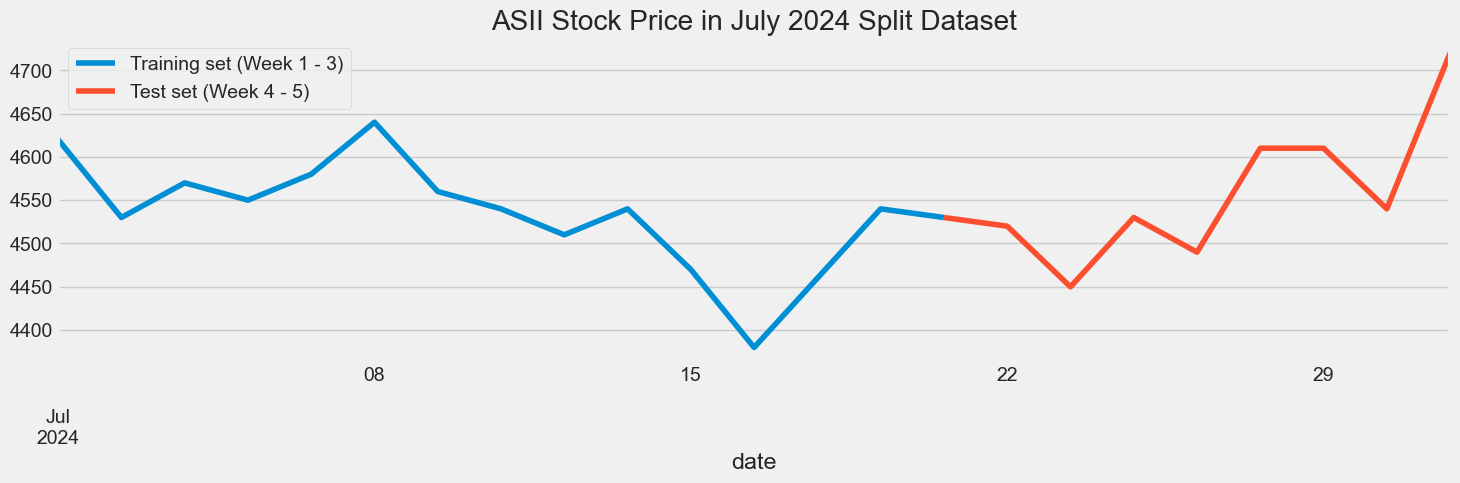

In [11]:
ASII["close"][start_date:med_date].plot(figsize=(16,4), legend=True)
ASII["close"][med_date:end_date].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (Week 1 - 3)","Test set (Week 4 - 5)"])
plt.title('ASII Stock Price in July 2024 Split Dataset')
plt.show()

In [12]:
ASII_short_train = ASII[start_date:med_date].iloc[:,3:4].values
ASII_short_test = ASII[med_date:end_date].iloc[:,3:4].values

#Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(ASII_short_train)
len_train = len(ASII_short_train)
len_test = len(ASII_short_test)
print(len_train, len_test)

# Since LSTMs store long term memory state, we create a data structure with 5 timesteps and 1 output
# So for each element of training set, we have 5 previous training set elements 
X_train = []
y_train = []
for i in range(5,len_train):
    X_train.append(training_set_scaled[i-5:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set


regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)



# initializing the RNN
regressorRNN = Sequential()

# adding first RNN layer and dropout regulatization
regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressorRNN.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding the output layer
regressorRNN.add(Dense(units = 1))

# compiling RNN
regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)


dataset_total = pd.concat((ASII["close"][start_date:med_date],ASII["close"][med_date:end_date]),axis=0)
inputs = dataset_total[len(dataset_total)-len(ASII_short_test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(5,len_test+5):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
RNN_predicted_stock_price = regressorRNN.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)


15 9


Epoch 1/50

1/1 [==============================] - 19s 19s/step - loss: 0.4015
Epoch 2/50
1/1 [==============================] - 0s 98ms/step - loss: 0.3647
Epoch 3/50
1/1 [==============================] - 0s 154ms/step - loss: 0.3354
Epoch 4/50
1/1 [==============================] - 0s 91ms/step - loss: 0.3092
Epoch 5/50
1/1 [==============================] - 0s 89ms/step - loss: 0.2748
Epoch 6/50
1/1 [==============================] - 0s 74ms/step - loss: 0.2368
Epoch 7/50
1/1 [==============================] - 0s 49ms/step - loss: 0.2042
Epoch 8/50
1/1 [==============================] - 0s 38ms/step - loss: 0.1561
Epoch 9/50
1/1 [==============================] - 0s 79ms/step - loss: 0.1383
Epoch 10/50
1/1 [==============================] - 0s 51ms/step - loss: 0.1135
Epoch 11/50
1/1 [==============================] - 0s 57ms/step - loss: 0.0974
Epoch 12/50
1/1 [==============================] - 0s 51ms/step - loss: 0.0640
Epoch 13/50
1/1 [==============================] - 0

In [13]:
# Visualize the data
# Plot the data
train = ASII[start_date:med_date]
valid = ASII[med_date:end_date]
valid['pred_lstm'] = LSTM_predicted_stock_price
valid['pred_gru'] = GRU_predicted_stock_price
valid['pred_rnn'] = RNN_predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model LSTM, GRU, and RNN in ASII Short Term Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
plt.show()


In [ ]:
# Evaluating the LSTM
rmse_ASII_short_LSTM = return_rmse(ASII_short_test, LSTM_predicted_stock_price)
norm_rmse_ASII_short_LSTM = return_rmse_norm(ASII_short_test, LSTM_predicted_stock_price)
# Evaluating the RNN
rmse_ASII_short_GRU = return_rmse(ASII_short_test, GRU_predicted_stock_price)
norm_rmse_ASII_short_GRU = return_rmse_norm(ASII_short_test, GRU_predicted_stock_price)
# Evaluating the sequence
rmse_ASII_short_RNN = return_rmse(ASII_short_test, RNN_predicted_stock_price)
norm_rmse_ASII_short_RNN = return_rmse_norm(ASII_short_test, RNN_predicted_stock_price)


The root mean squared error is 54.463577649156704.
The root mean squared error after normalization is 0.38902555463683375.
The root mean squared error is 51.325071916335226.
The root mean squared error after normalization is 0.36660765654525285.
The root mean squared error is 82.17326355660975.
The root mean squared error after normalization is 0.5869518825472128.


In [ ]:
#add to the table
#add result LSTM for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('short')
dic_res['algorithm'].append('LSTM')
dic_res['rmse'].append(rmse_ASII_short_LSTM)
dic_res['rmse_norm'].append(norm_rmse_ASII_short_LSTM)

#add result GRU for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('short')
dic_res['algorithm'].append('GRU')
dic_res['rmse'].append(rmse_ASII_short_GRU)
dic_res['rmse_norm'].append(norm_rmse_ASII_short_GRU)

#add result RNN for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('short')
dic_res['algorithm'].append('RNN')
dic_res['rmse'].append(rmse_ASII_short_RNN)
dic_res['rmse_norm'].append(norm_rmse_ASII_short_RNN)

In [ ]:
dic_res

{'stock': ['ASII', 'ASII', 'ASII'],
 'term': ['short', 'short', 'short'],
 'algorithm': ['LSTM', 'GRU', 'RNN'],
 'rmse': [54.463577649156704, 51.325071916335226, 82.17326355660975],
 'rmse_norm': [0.38902555463683375, 0.36660765654525285, 0.5869518825472128]}

### Long Term Prediction

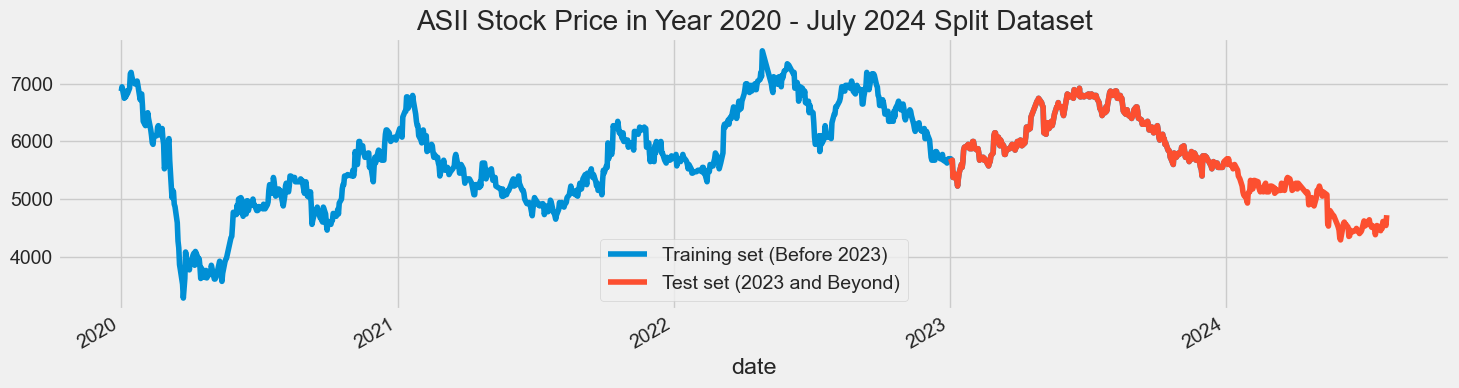

In [ ]:
ASII["close"][:year].plot(figsize=(16,4), legend=True)
ASII["close"][year:].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (Before 2023)","Test set (2023 and Beyond)"])
plt.title('ASII Stock Price in Year 2020 - July 2024 Split Dataset')
plt.show()

In [ ]:
ASII_long_train = ASII[:year].iloc[:,3:4].values
ASII_long_test = ASII[year:].iloc[:,3:4].values

#Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(ASII_long_train)
len_train = len(ASII_long_train)
len_test = len(ASII_long_test)
print(len_train, len_test)

# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,len_train):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set


regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)



# initializing the RNN
regressorRNN = Sequential()

# adding first RNN layer and dropout regulatization
regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressorRNN.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding the output layer
regressorRNN.add(Dense(units = 1))

# compiling RNN
regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)


dataset_total = pd.concat((ASII["close"][:year],ASII["close"][year:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(ASII_long_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len_test+60):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
RNN_predicted_stock_price = regressorRNN.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)


974 372
Epoch 1/50
29/29 [==============================] - 59s 286ms/step - loss: 0.0452
Epoch 2/50
29/29 [==============================] - 5s 179ms/step - loss: 0.0211
Epoch 3/50
29/29 [==============================] - 5s 177ms/step - loss: 0.0179
Epoch 4/50
29/29 [==============================] - 6s 203ms/step - loss: 0.0175
Epoch 5/50
29/29 [==============================] - 8s 261ms/step - loss: 0.0144
Epoch 6/50
29/29 [==============================] - 5s 167ms/step - loss: 0.0118
Epoch 7/50
29/29 [==============================] - 4s 147ms/step - loss: 0.0134
Epoch 8/50
29/29 [==============================] - 4s 154ms/step - loss: 0.0123
Epoch 9/50
29/29 [==============================] - 7s 255ms/step - loss: 0.0125
Epoch 10/50
29/29 [==============================] - 4s 140ms/step - loss: 0.0104
Epoch 11/50
29/29 [==============================] - 4s 126ms/step - loss: 0.0115
Epoch 12/50
29/29 [==============================] - 4s 125ms/step - loss: 0.0096
Epoch 13/50
29/2

In [ ]:
# Visualize the data
# Plot the data
train = ASII[:year]
valid = ASII[year:]
valid['pred_lstm'] = LSTM_predicted_stock_price
valid['pred_gru'] = GRU_predicted_stock_price
valid['pred_rnn'] = RNN_predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model LSTM, GRU, and RNN in ASII Long Term Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
plt.show()


ValueError: Length of values (9) does not match length of index (372)

In [ ]:
# Evaluating the LSTM
rmse_ASII_long_LSTM = return_rmse(ASII_long_test, LSTM_predicted_stock_price)
norm_rmse_ASII_long_LSTM = return_rmse_norm(ASII_long_test, LSTM_predicted_stock_price)
# Evaluating the RNN
rmse_ASII_long_GRU = return_rmse(ASII_long_test, GRU_predicted_stock_price)
norm_rmse_ASII_long_GRU = return_rmse_norm(ASII_long_test, GRU_predicted_stock_price)
# Evaluating the sequence
rmse_ASII_long_RNN = return_rmse(ASII_long_test, RNN_predicted_stock_price)
norm_rmse_ASII_long_RNN = return_rmse_norm(ASII_long_test, RNN_predicted_stock_price)


The root mean squared error is 187.8425303638887.
The root mean squared error after normalization is 0.07409961750054779.
The root mean squared error is 193.31576560517817.
The root mean squared error after normalization is 0.076258684656875.
The root mean squared error is 186.45359359552924.
The root mean squared error after normalization is 0.06947344323169684.


In [ ]:
#add to the table
#add result LSTM for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('long')
dic_res['algorithm'].append('LSTM')
dic_res['rmse'].append(rmse_ASII_long_LSTM)
dic_res['rmse_norm'].append(norm_rmse_ASII_long_LSTM)

#add result GRU for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('long')
dic_res['algorithm'].append('GRU')
dic_res['rmse'].append(rmse_ASII_long_GRU)
dic_res['rmse_norm'].append(norm_rmse_ASII_long_GRU)

#add result RNN for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('long')
dic_res['algorithm'].append('RNN')
dic_res['rmse'].append(rmse_ASII_long_RNN)
dic_res['rmse_norm'].append(norm_rmse_ASII_long_RNN)

## GOTO

### Short Term Predictions

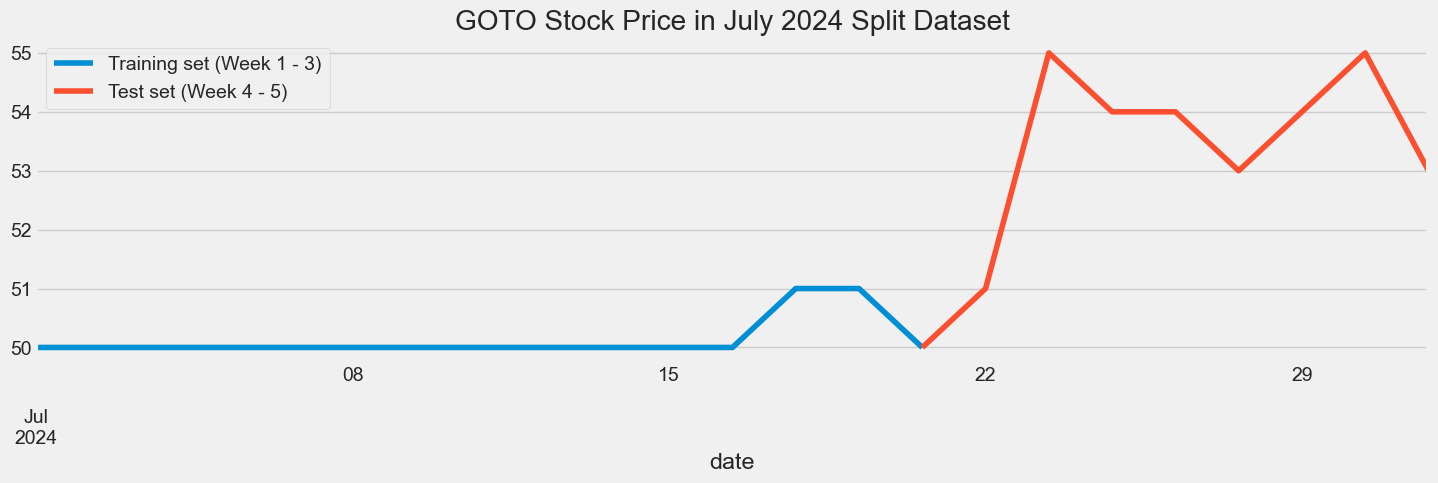

In [ ]:
GOTO["close"][start_date:med_date].plot(figsize=(16,4), legend=True)
GOTO["close"][med_date:end_date].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (Week 1 - 3)","Test set (Week 4 - 5)"])
plt.title('GOTO Stock Price in July 2024 Split Dataset')
plt.show()

In [ ]:
GOTO_short_train = GOTO[start_date:med_date].iloc[:,3:4].values
GOTO_short_test = GOTO[med_date:end_date].iloc[:,3:4].values

#Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(GOTO_short_train)
len_train = len(GOTO_short_train)
len_test = len(GOTO_short_test)
print(len_train, len_test)

# Since LSTMs store long term memory state, we create a data structure with 5 timesteps and 1 output
# So for each element of training set, we have 5 previous training set elements 
X_train = []
y_train = []
for i in range(5,len_train):
    X_train.append(training_set_scaled[i-5:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set


regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)



# initializing the RNN
regressorRNN = Sequential()

# adding first RNN layer and dropout regulatization
regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressorRNN.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding the output layer
regressorRNN.add(Dense(units = 1))

# compiling RNN
regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)


dataset_total = pd.concat((GOTO["close"][start_date:med_date],GOTO["close"][med_date:end_date]),axis=0)
inputs = dataset_total[len(dataset_total)-len(GOTO_short_test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(5,len_test+5):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
RNN_predicted_stock_price = regressorRNN.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)


15 9
Epoch 1/50
1/1 [==============================] - 44s 44s/step - loss: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 100ms/step - loss: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 246ms/step - loss: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 49ms/step - loss: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 51ms/step - loss: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 64ms/step - loss: 0.0000e+00
Epoch 8/50
1/1 [==============================] - 0s 171ms/step - loss: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 54ms/step - loss: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00
Epoch 11/50
1/1 [==============================] - 0s 68ms/step - loss: 0.0000e+00
Epoch 12/50
1/1 [==============================] - 0s 58ms/step - loss: 0.0000e+00
Epoc

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_8360\3475130776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_8360\3475130776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_8360\3475130776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

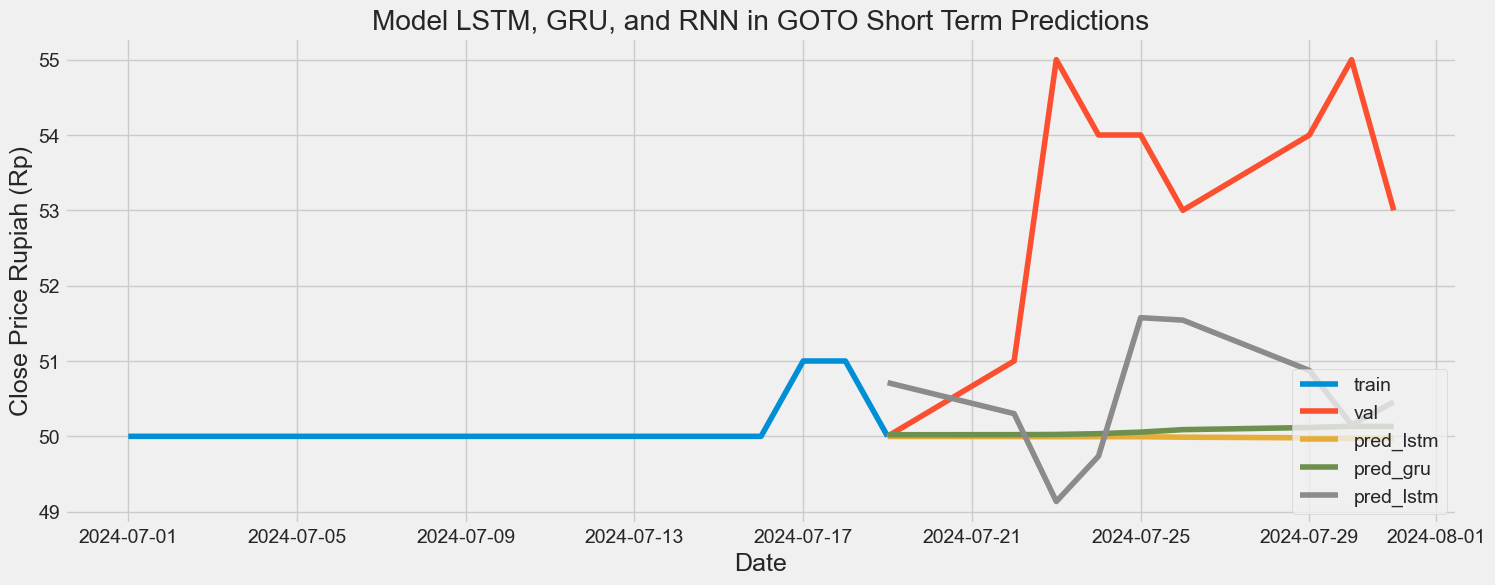

In [ ]:
# Visualize the data
# Plot the data
train = GOTO[start_date:med_date]
valid = GOTO[med_date:end_date]
valid['pred_lstm'] = LSTM_predicted_stock_price
valid['pred_gru'] = GRU_predicted_stock_price
valid['pred_rnn'] = RNN_predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model LSTM, GRU, and RNN in GOTO Short Term Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
plt.show()


In [ ]:
# Evaluating the LSTM
rmse_GOTO_short_LSTM = return_rmse(GOTO_short_test, LSTM_predicted_stock_price)
norm_rmse_GOTO_short_LSTM = return_rmse_norm(GOTO_short_test, LSTM_predicted_stock_price)
# Evaluating the RNN
rmse_GOTO_short_GRU = return_rmse(GOTO_short_test, GRU_predicted_stock_price)
norm_rmse_GOTO_short_GRU = return_rmse_norm(GOTO_short_test, GRU_predicted_stock_price)
# Evaluating the sequence
rmse_GOTO_short_RNN = return_rmse(GOTO_short_test, RNN_predicted_stock_price)
norm_rmse_GOTO_short_RNN = return_rmse_norm(GOTO_short_test, RNN_predicted_stock_price)


The root mean squared error is 2.369343737458504.
The root mean squared error after normalization is 0.7825974448621897.
The root mean squared error is 2.282949960067056.
The root mean squared error after normalization is 0.7609833200223513.
The root mean squared error is 1.9401919221860144.
The root mean squared error after normalization is 0.5019849755274944.


In [ ]:
#add to the table
#add result LSTM for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('short')
dic_res['algorithm'].append('LSTM')
dic_res['rmse'].append(rmse_GOTO_short_LSTM)
dic_res['rmse_norm'].append(norm_rmse_GOTO_short_LSTM)

#add result GRU for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('short')
dic_res['algorithm'].append('GRU')
dic_res['rmse'].append(rmse_GOTO_short_GRU)
dic_res['rmse_norm'].append(norm_rmse_GOTO_short_GRU)

#add result RNN for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('short')
dic_res['algorithm'].append('RNN')
dic_res['rmse'].append(rmse_GOTO_short_RNN)
dic_res['rmse_norm'].append(norm_rmse_GOTO_short_RNN)

### Long Term Predictions

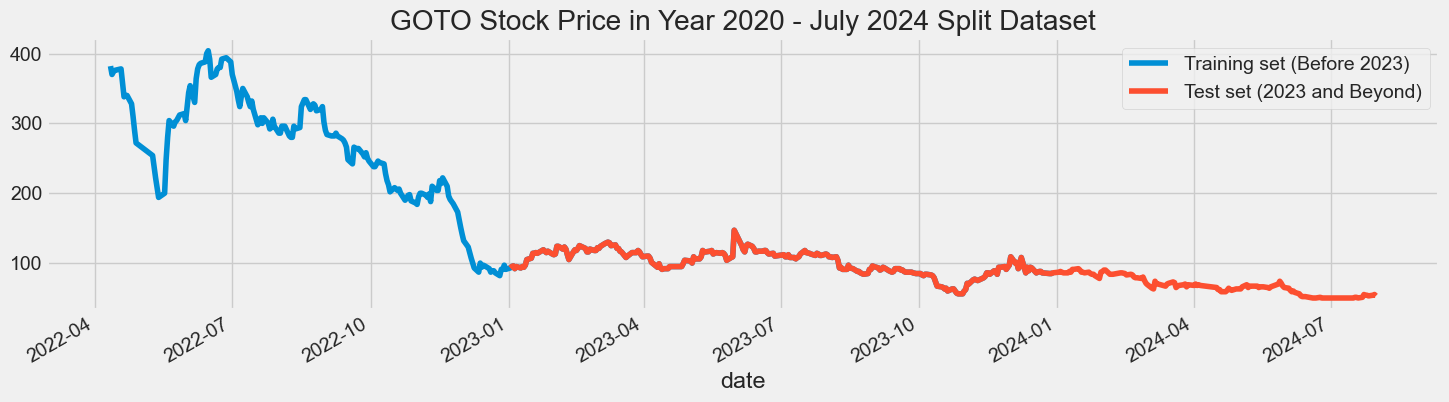

In [ ]:
GOTO["close"][:year].plot(figsize=(16,4), legend=True)
GOTO["close"][year:].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (Before 2023)","Test set (2023 and Beyond)"])
plt.title('GOTO Stock Price in Year 2020 - July 2024 Split Dataset')
plt.show()

In [ ]:
GOTO_long_train = GOTO[:year].iloc[:,3:4].values
GOTO_long_test = GOTO[year:].iloc[:,3:4].values

#Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(GOTO_long_train)
len_train = len(GOTO_long_train)
len_test = len(GOTO_long_test)
print(len_train, len_test)

# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,len_train):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set


regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)



# initializing the RNN
regressorRNN = Sequential()

# adding first RNN layer and dropout regulatization
regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressorRNN.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding the output layer
regressorRNN.add(Dense(units = 1))

# compiling RNN
regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)


dataset_total = pd.concat((GOTO["close"][:year],GOTO["close"][year:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(GOTO_long_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len_test+60):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
RNN_predicted_stock_price = regressorRNN.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)


418 372
Epoch 1/50
12/12 [==============================] - 20s 120ms/step - loss: 0.0286
Epoch 2/50
12/12 [==============================] - 2s 170ms/step - loss: 0.0100
Epoch 3/50
12/12 [==============================] - 2s 176ms/step - loss: 0.0093
Epoch 4/50
12/12 [==============================] - 1s 117ms/step - loss: 0.0100
Epoch 5/50
12/12 [==============================] - 1s 117ms/step - loss: 0.0055
Epoch 6/50
12/12 [==============================] - 2s 192ms/step - loss: 0.0191
Epoch 7/50
12/12 [==============================] - 3s 217ms/step - loss: 0.0056
Epoch 8/50
12/12 [==============================] - 2s 139ms/step - loss: 0.0076
Epoch 9/50
12/12 [==============================] - 1s 110ms/step - loss: 0.0062
Epoch 10/50
12/12 [==============================] - 1s 107ms/step - loss: 0.0065
Epoch 11/50
12/12 [==============================] - 1s 113ms/step - loss: 0.0061
Epoch 12/50
12/12 [==============================] - 1s 123ms/step - loss: 0.0096
Epoch 13/50
12/1

KeyboardInterrupt: 

In [ ]:
# Visualize the data
# Plot the data
train = GOTO[:year]
valid = GOTO[year:]
valid['pred_lstm'] = LSTM_predicted_stock_price
valid['pred_gru'] = GRU_predicted_stock_price
valid['pred_rnn'] = RNN_predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model LSTM, GRU, and RNN in GOTO Long Term Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
plt.show()


In [ ]:
# Evaluating the LSTM
rmse_GOTO_long_LSTM = return_rmse(GOTO_long_test, LSTM_predicted_stock_price)
norm_rmse_GOTO_long_LSTM = return_rmse_norm(GOTO_long_test, LSTM_predicted_stock_price)
# Evaluating the RNN
rmse_GOTO_long_GRU = return_rmse(GOTO_long_test, GRU_predicted_stock_price)
norm_rmse_GOTO_long_GRU = return_rmse_norm(GOTO_long_test, GRU_predicted_stock_price)
# Evaluating the sequence
rmse_GOTO_long_RNN = return_rmse(GOTO_long_test, RNN_predicted_stock_price)
norm_rmse_GOTO_long_RNN = return_rmse_norm(GOTO_long_test, RNN_predicted_stock_price)


In [ ]:
#add to the table
#add result LSTM for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('long')
dic_res['algorithm'].append('LSTM')
dic_res['rmse'].append(rmse_GOTO_long_LSTM)
dic_res['rmse_norm'].append(norm_rmse_GOTO_long_LSTM)

#add result GRU for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('long')
dic_res['algorithm'].append('GRU')
dic_res['rmse'].append(rmse_GOTO_long_GRU)
dic_res['rmse_norm'].append(norm_rmse_GOTO_long_GRU)

#add result RNN for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('long')
dic_res['algorithm'].append('RNN')
dic_res['rmse'].append(rmse_GOTO_long_RNN)
dic_res['rmse_norm'].append(norm_rmse_GOTO_long_RNN)

In [ ]:
res = pd.DataFrame(dic_res)

In [ ]:
res

,stock,term,algorithm,rmse,rmse_norm
0,ASII,short,LSTM,54.463578,0.389026
1,ASII,short,GRU,51.325072,0.366608
2,ASII,short,RNN,82.173264,0.586952
3,GOTO,short,LSTM,2.369344,0.782597
4,GOTO,short,GRU,2.282950,0.760983
5,GOTO,short,RNN,1.940192,0.501985
6,ASII,long,LSTM,187.842530,0.074100
7,ASII,long,GRU,193.315766,0.076259
8,ASII,long,RNN,186.453594,0.069473
